# Allgemeines 

## Plotten
```python
# Numpy importieren und Text laden
import numpy as np
data = np.loadtxt("meine_textdatei.txt", delimiter=",")
# Matplotlib
import matplotlib.pyplot as plt
plt.xlabel('Text')
plt.ylabel('Text')
plt.title('Text')
plt.axis([xmin, xmax, ymin, ymax])
plt.grid(True) # Gitternetzlinien
# daten splitten
x_train, x_test, y_train, y_test = split(data[:,:2], data[:,2], test_size=0.2)
```

In [8]:
# Alle benötigten Module laden
import matplotlib.pyplot as plt
import seaborn as sns  # Schönere Grafiken
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import accuracy_score as score
from sklearn.cluster import KMeans

# Lineare regression

- eine der am meisten genutzten statistischen Methoden
- drückt die mathematische Beziehung zwischen zwei Variablen aus
- Annahme: lineare Zusammenhang zwischen Antwort- und Prädiktorvariable
- Linearität vereinfacht möglichen tatsächlichen Zusammenhang, ABER sie ist ein guter Startpunkt für weitere Untersuchungen

Beispiele:

1. je mehr Waren verkauft werden, desto höher der Umsatz
    = linearer Zusammenhang 
2. jede infizierte Person, steckt zwei weitere Personen an
    b) Exponentieller Zusammenhang (Wachstum), Kein linearer Zusammenhang. Daten liegen nicht auf einer geraden:
    Keine lineare Regression versuchen 
    
### warum lineare Regression…?
- um Beziehungen besser zu verstehen / besser beschreiben zu können
- etwa: gibt es einen Zusammenhang zwischen Anzahl der Freunde in sozialen Medien und der Zeit, die eine Person täglich auf derartigen Plattformen verbringt

## Ausgangspunkt: Geradengleichung

$ y=f(x) = \beta_0 + \beta_1 * x$

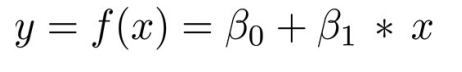

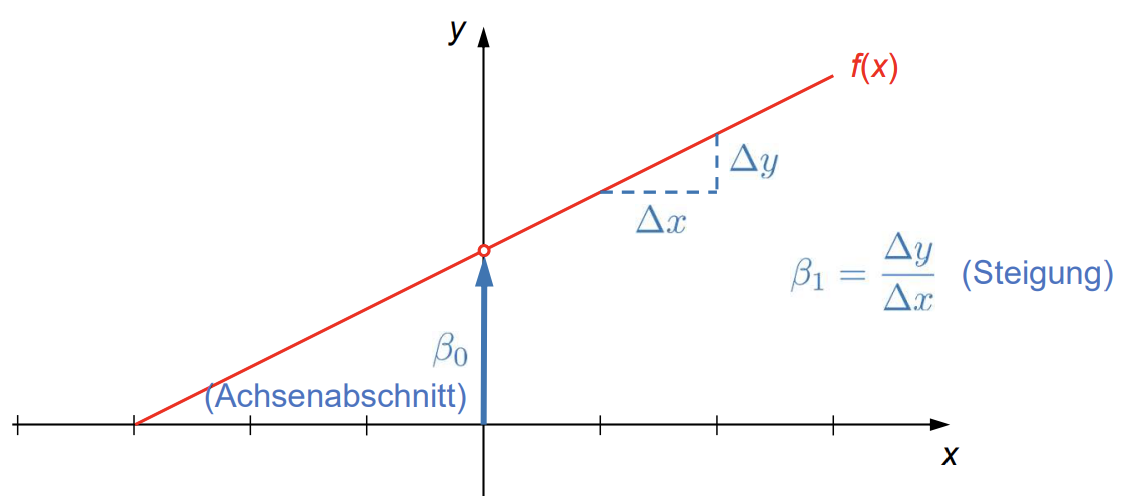

## Lineare Regression durchführen
```python
from sklearn.linear_model import LinearRegression as lr
model = lr()
model.fit(xdata, ydata)
#- Problem: xdata ist Spaltenvektor
xdata = data[:,0].reshape((-1, 1))
ydata = data[:,1]
# -> Bedeutung von (-1, 1): unbekannte Anzahl an Zeilen bei genau einer Spalte -> Spaltenvektor
y_pred = model.predict(xdata)
plt.plot(xdata, y_pred, 'b-') # plotten
plt.plot(data[:,0], data_y, 'ro')
plt.plot(data_x, y_pred, 'b-')
plt.show()
```
**$\beta_0$ und $\beta_1$**
```python
beta0 = model.intercept_
beta1 = model.coef_
print(beta0, beta1)
```

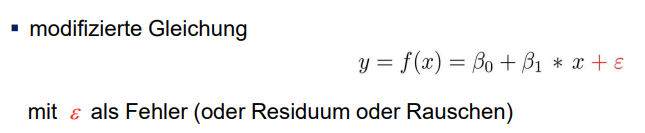

**MSE (mean square error - mittlere quadratische abweichung**
- MSE ist ein gutes Mass für die Varianz (vgl. Varianz aus der Statistik), d.h. wie stark die vorhergesagten Werte $(ŷ_i)$ von den tatsächlichen / beobachteten Werten $(y_i)$ variieren

```python
from sklearn.metrics import mean_squared_error as mse
mse(y_true, y_pred, squared=true) # sonst wird RSME wiedergegeben   

```

**$R^2$**
- Je näher bei 1, desto genauer liegt die gerade auf allen punkten
- berechnen


```python
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

```

### Kreuzvalidierung 

```python
# grösse des datensatzes herausfinden
split= int(x_data.size)
x_train = x_data[:-split]
x_test = x_data[-split:]
y_train = y_data[:-split]
y_test = y_data[-split:]
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
plt.plot(x_test,y_test,'ro')
plt.plot(x_test,y_pred,'b-')
plt.show()
```

# k-Nächste-Nachbarn

- Ausgangssituation
    - Punktewolke von bereits klassifizierten Objekten (z.B. Krebsrisiko bei Patienten)
    - neue, unklassifizierte Patienten sollen aufgenommen und klassifiziert werden
    - Frage: lineare Regression ja oder nein…?
- LR grundsätzlich möglich, ABER
    - keine kontinuierliche, sondern kategoriale Variable
    - Modellierung als verschiedene Bereiche (z.B. 'gering', 'mittel', 'hoch', 'sehr hoch', …)
    - nicht für alle Probleme umsetzbar (z.B. 'vermutlich Demokrat', 'vermutlich Republikaner', …)
    - anderes Konzept notwendig →***k-NN***
    
## Idee k-NN

1. betrachte ähnliche Objekte (im Hinblick auf ihre Attribute)
2. entscheide bzgl. deren Klassifizierung (Mehrheitsentscheid)
3. bei Gleichstand entscheide zufällig (aus den Mehrheiten)

## Umsetzung / Einzelschritte

1. Ähnlichkeits- oder Distanzmetrik
2. Klassifikationsalgorithmus
3. Festlegung Bewertungsmass
4. Aufteilung der klassifizierten Daten in Trainings- und Testdaten
5. mehrere Durchläufe k-NN für unterschiedliche Werte von k
6. wähle k bzgl. bester erreichter Bewertung
7. Klassifikation neuer Daten
- Prinzip / Theorie soweit klar, ab zur Mathematik…

## Ähnlichkeits- oder Distanzmetrik

![image.png](attachment:image.png)

## Bewertungsmass

![image-2.png](attachment:image-2.png)

- Treffsicherheit = (Anzahl korrekter Vorhersagen)/(Anzahl Werte) # Kann auch in Prozent angegeben werden
- Hamming Verlust 1 - Treffsicherheit
    - Hamming Verlust = Wieviele sind Falsch klassifiziert (Gegenstück zur Treffsicherheit)

## k-NN: Daten plotten
- Erste und zweite spalte = Daten , dritte spalte = Klassifizierung
```python
# Daten Plotten 
plt.axis([10,80,0,120])
colors = ['red', 'blue'] # Array mit den beiden farben 
# Farbcodierungen in Colormap speichern 
import matplotlib.colors 
cmap = matplotlib.colors.ListedColormap(colors)
plt.scatter(data[:,0], data[:,1], c=data[:,2], cmap=cmap)
plt.show()
cmap
````



## Modell aufsetzen und trainieren (Kreuzvalidierung)
```python
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import accuracy_score as score
x_train, x_test, y_train, y_test = split(data[:,:2], data[:,2], test_size=0.2)
model = knn(n_neighbors=k)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score(y_test, y_pred)
````

# k-Mitten
- was bisher geschah...
    - überwachtes Lernen (*k-NN*)
    - 'korrekte' Antwort (d.h. Klassifizierung) a-priori bekannt
    - Modell damit bestmöglich trainiert (hohe Treffsicherheit ./. geringer Verlust)
- was ist jetzt anders…?
    - Ausgangslage: unklassifizierte Daten
    - 'korrekte' Antwort resp. irgendeine Antwort nicht bekannt
    - überwachtes Lernen nicht anwendbar
    - unüberwachtes Lernen
    - Algorithmus der Stunde: *k-Mitten* (engl. *k-means*)
- Idee
    - Klassifikation der Daten durch Clusterbildung (Gruppen)
    - Cluster sollen Elemente mit ähnlichen Attributen enthalten
- Gedankenexperiment: manuelle Eingruppierung
    - Daten enthalten Alter, Geschlecht, Einkommen, Kanton, Haushaltsgrösse
    - Festlegung von Bereichen / Gruppen (z.B. Alter 20-24, 25-29, …)
    - Ergebnis: Alter (10-Kategorien), Geschlecht (3), Einkommen (20), Kanton (26), Haushaltsgrösse (3)
    - daraus folgt: 5-dimensionaler Raum mit 10x3x20x26x3=46'800 Einträgen
        - Ist ein bisschen gross (sogar für Statistiker)
    - → Ausweg: Gruppierung der Gruppen (der Gruppen (der Gruppen (…)))
        - Manuelle Gruppierung

## Ellenbogenmethode
- k-Mitten versucht, die Trägheit (inertia) bzgl. der Mittelpunkte zu minimieren
- Trägheit des Modells: model.inertia_
- guter k-Wert am Knick des Ellenbogens

## Bester k-Wert für k-means herausfinden (Ellenbogen-Methode)
```python
x_data = data[:,:2] # Spalten 0 und 1 -> Koordinaten
y_data = data[:,2] # Spalte 2 -< korrekte Klassifikation
inert = []
for k in range(1,11):
    model = KMeans(k)
    model.fit(x_data)
    inert.append(model.inertia_)
x = np.linspace(1,10,10)
plt.plot(x, inert, ‘b-’)
plt.plot(x, inert, ‘bo’)
plt.show() 
````